In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [42]:
pd.set_option('display.max_columns', None)


In [43]:
df = pd.read_csv('../data/final_data.csv')
df

,Date,Hour,DEgen,DEload,DKgen,DKload,HUgen,HUload,ITgen,ITload,NEgen,NEload,POgen,POload,SEgen,SEload,SPgen,SPload,HU_surplus,IT_surplus,PO_surplus,SP_surplus,DE_surplus,DK_surplus,SE_surplus,NE_surplus,label,spring,summer,winter,day_of_week,is_weekend
0,2022-01-01,0,157373.0,165125.0,3605.0,3218.0,1376.0,16457.0,5745.0,19756.0,12768.0,40706.0,4491.0,13935.0,11107.0,15331.0,10827.0,19530.0,-15081.0,-14011.0,-9444.0,-8703.0,-7752.0,387.0,-4224.0,-27938.0,5,0,0,1,5,1
1,2022-01-01,1,151747.0,160415.0,3309.0,3126.0,1526.0,15426.0,6228.0,18685.0,11131.0,39465.0,4436.0,13579.0,11036.0,15270.0,11140.0,18383.0,-13900.0,-12457.0,-9143.0,-7243.0,-8668.0,183.0,-4234.0,-28334.0,5,0,0,1,5,1
2,2022-01-01,2,147938.0,158035.0,3043.0,3080.0,1560.0,14781.0,6407.0,18124.0,11324.0,38923.0,4568.0,13397.0,10509.0,15150.0,11361.0,17680.0,-13221.0,-11717.0,-8829.0,-6319.0,-10097.0,-37.0,-4641.0,-27599.0,5,0,0,1,5,1
3,2022-01-01,3,141816.0,157016.0,2852.0,3044.0,1287.0,14630.0,5760.0,18400.0,11290.0,38211.0,4559.0,13364.0,10770.0,15387.0,11247.0,17396.0,-13343.0,-12640.0,-8805.0,-6149.0,-15200.0,-192.0,-4617.0,-26921.0,5,0,0,1,5,1
4,2022-01-01,4,131970.0,154552.0,2724.0,3130.0,1309.0,14688.0,5501.0,19223.0,11093.0,38146.0,4374.0,13449.0,10852.0,15737.0,10868.0,17544.0,-13379.0,-13722.0,-9075.0,-6676.0,-22582.0,-406.0,-4885.0,-27053.0,5,0,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31,19,175631.0,184106.0,1765.0,3713.0,851.0,17488.0,4198.0,24809.0,17241.0,45646.0,6959.0,15211.0,10179.0,14440.0,67056.0,104484.0,-16637.0,-20611.0,-8252.0,-37428.0,-8475.0,-1948.0,-4261.0,-28405.0,5,0,0,1,5,1
8756,2022-12-31,20,176499.0,175401.0,1593.0,3579.0,888.0,17075.0,3676.0,23169.0,17233.0,43425.0,6910.0,14641.0,9586.0,14201.0,62432.0,97124.0,-16187.0,-19493.0,-7731.0,-34692.0,1098.0,-1986.0,-4615.0,-26192.0,4,0,0,1,5,1
8757,2022-12-31,21,175678.0,168830.0,1788.0,3520.0,807.0,16717.0,3641.0,21857.0,17129.0,41766.0,7054.0,13977.0,9148.0,13713.0,61096.0,87316.0,-15910.0,-18216.0,-6923.0,-26220.0,6848.0,-1732.0,-4565.0,-24637.0,4,0,0,1,5,1
8758,2022-12-31,22,165104.0,161541.0,2242.0,3440.0,754.0,16261.0,3422.0,20555.0,15939.0,40415.0,5946.0,13272.0,8806.0,13772.0,55252.0,82064.0,-15507.0,-17133.0,-7326.0,-26812.0,3563.0,-1198.0,-4966.0,-24476.0,4,0,0,1,5,1


In [44]:

#X--> We create an array with 8 countries and 8759 hours of 7 features.
# y--> The surplus will be our target, so we created another array of 8 countries and 8769 hours using the surplus column
countries = ['HU', 'IT', 'PO', 'SP', 'DE', 'DK', 'SE', 'NE']
num_countries = len(countries)

features = ['Hour', 'spring', 'summer', 'winter', 'day_of_week', 'is_weekend',
    'DEgen', 'DKgen',  'HUgen', 'ITgen', 'NEgen',  'POgen', 'SEgen', 'SPgen',
    'DEload', 'DKload', 'HUload', 'ITload', 'NEload', 'POload', 'SEload', 'SPload', 
    'DE_surplus',  'DK_surplus', 'HU_surplus', 'IT_surplus', 'NE_surplus', 'PO_surplus', 'SE_surplus', 'SP_surplus'  
]
num_features = len(features)

label_column = 'label'


print('num_features: ', num_features)

num_features:  30


### Split

In [45]:
def train_val_test_df_split(perc, df):

    # split df
    # test
    split = int(df.shape[0]*perc)
    df_aux = df[:split]
    df_test = df[split:]

    # train and validation
    split = int(df_aux.shape[0]*perc)
    df_train = df_aux[:split]
    df_val = df_aux[split:]

    return df_train, df_val, df_test


perc = 0.8
df_train, df_val, df_test = train_val_test_df_split(perc, df)

print("Shapes:")
print("df_train:", df_train.shape)
print('==================')
print("df_val:", df_val.shape)
print('==================')
print("df_test:", df_test.shape)


Shapes:
df_train: (5606, 32)
df_val: (1402, 32)
df_test: (1752, 32)


### Checking the distribution for each feature

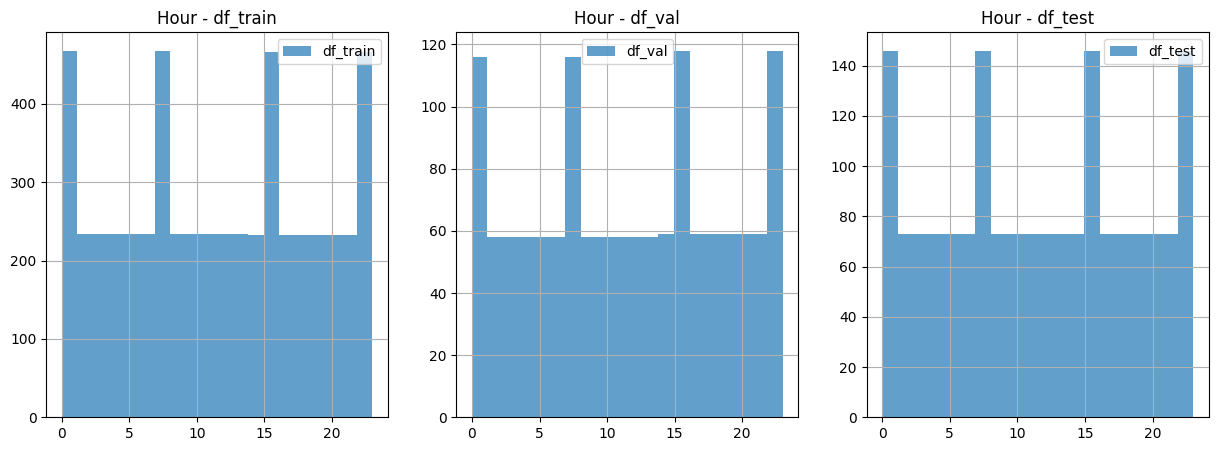

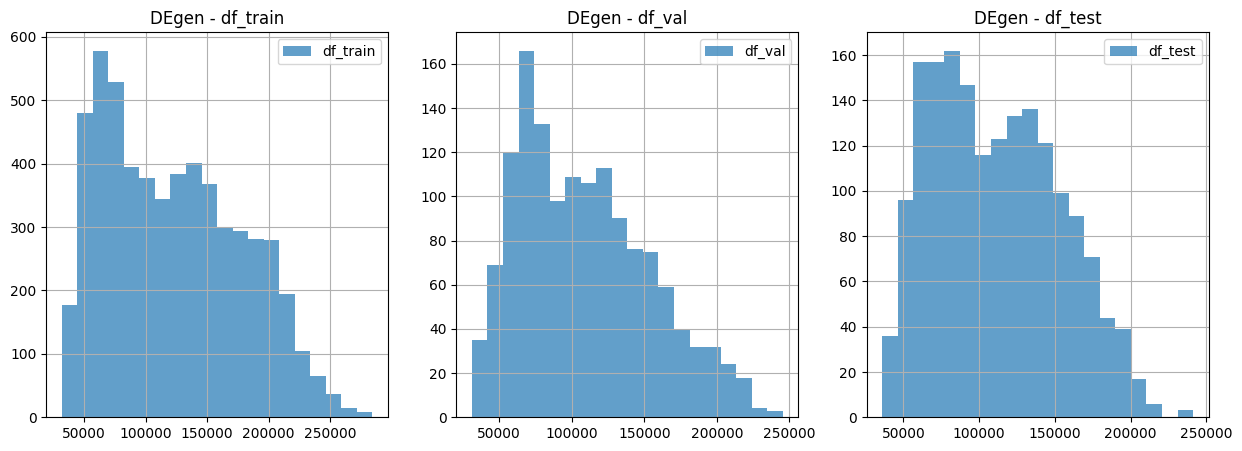

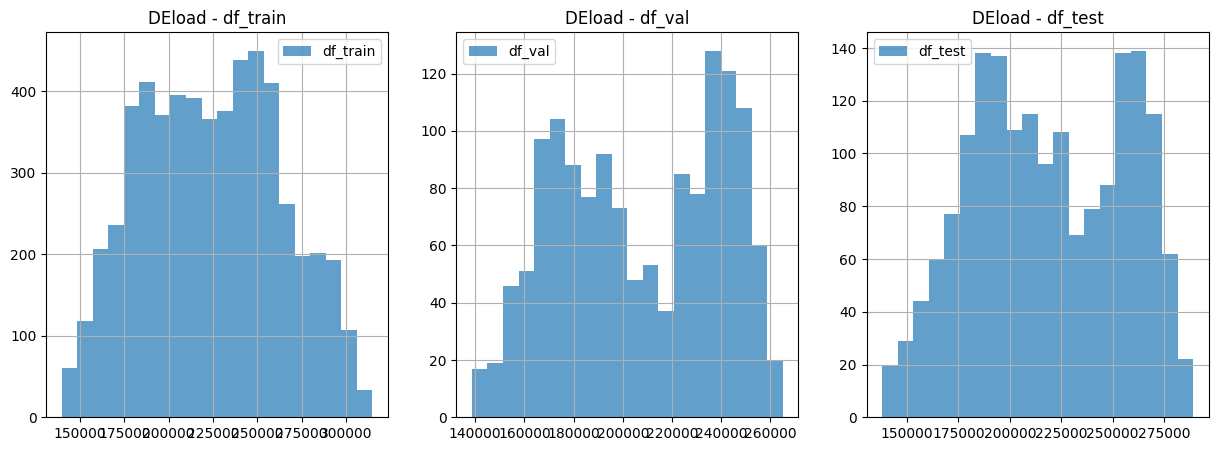

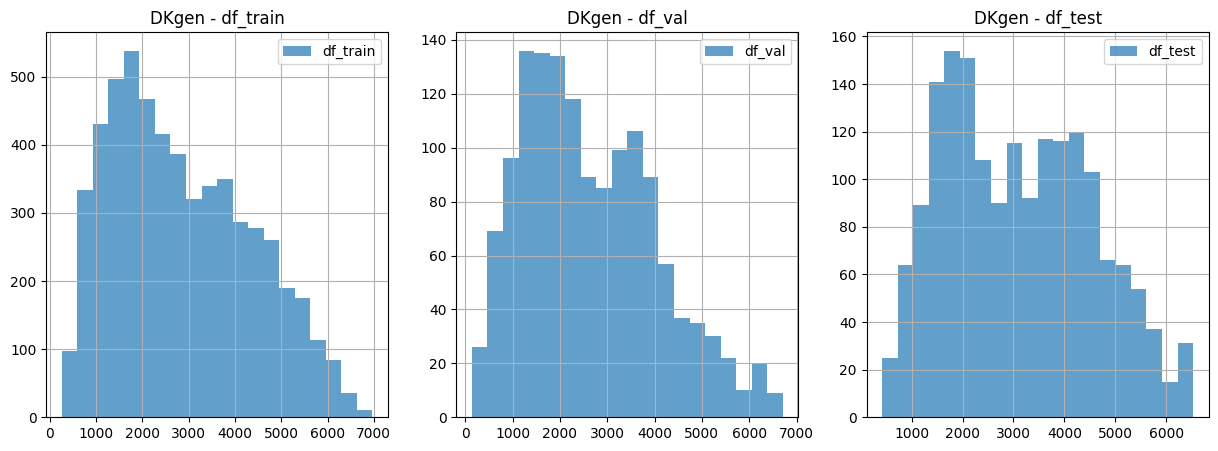

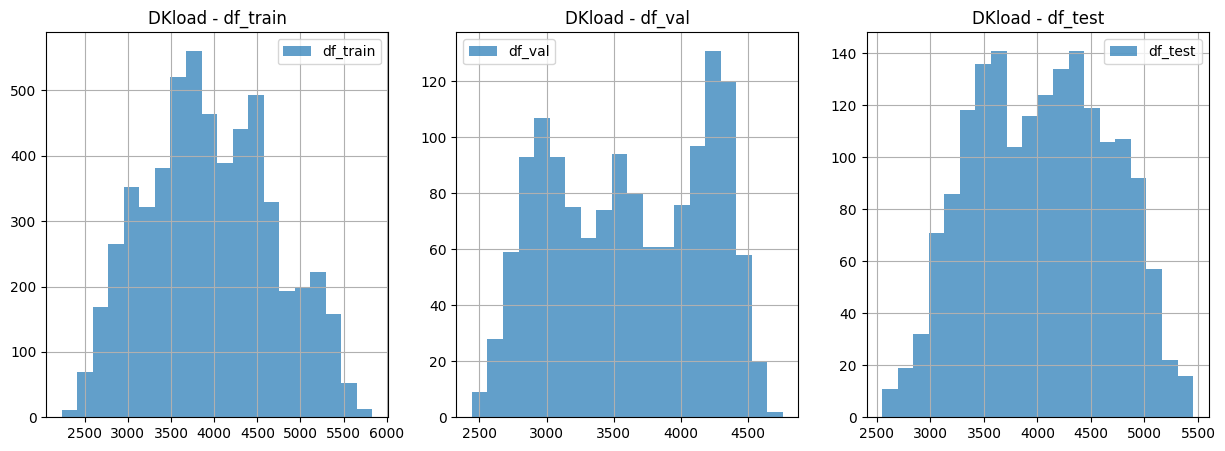

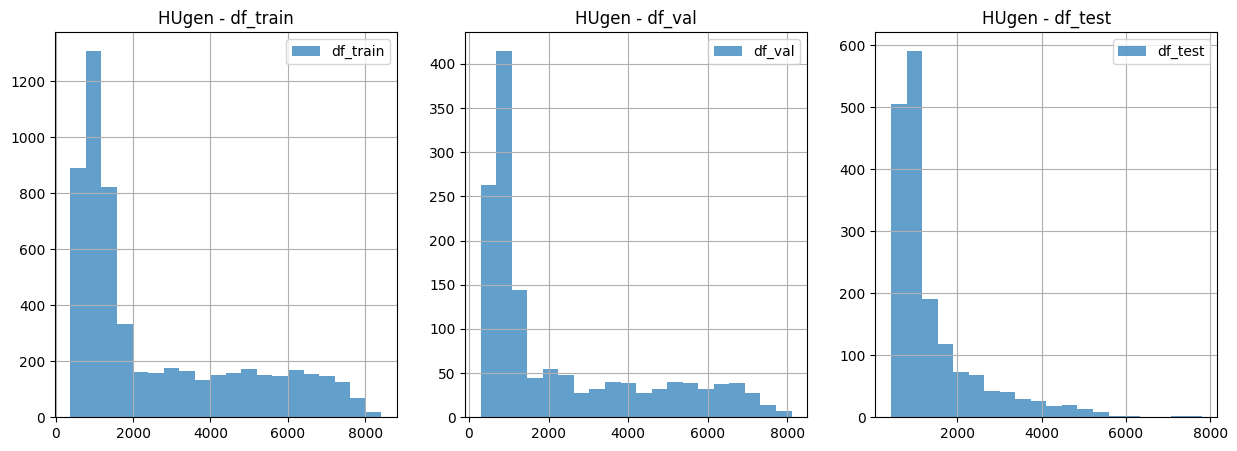

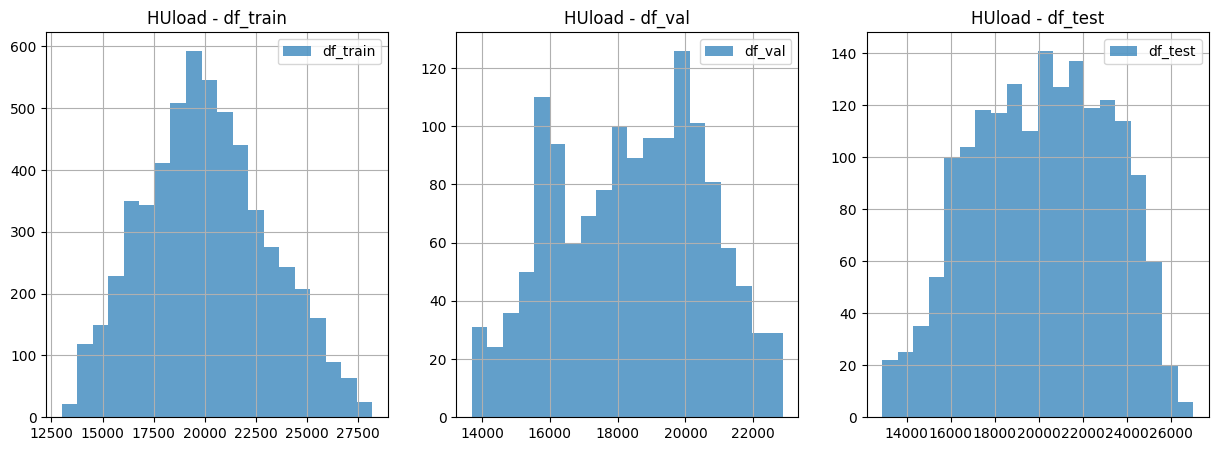

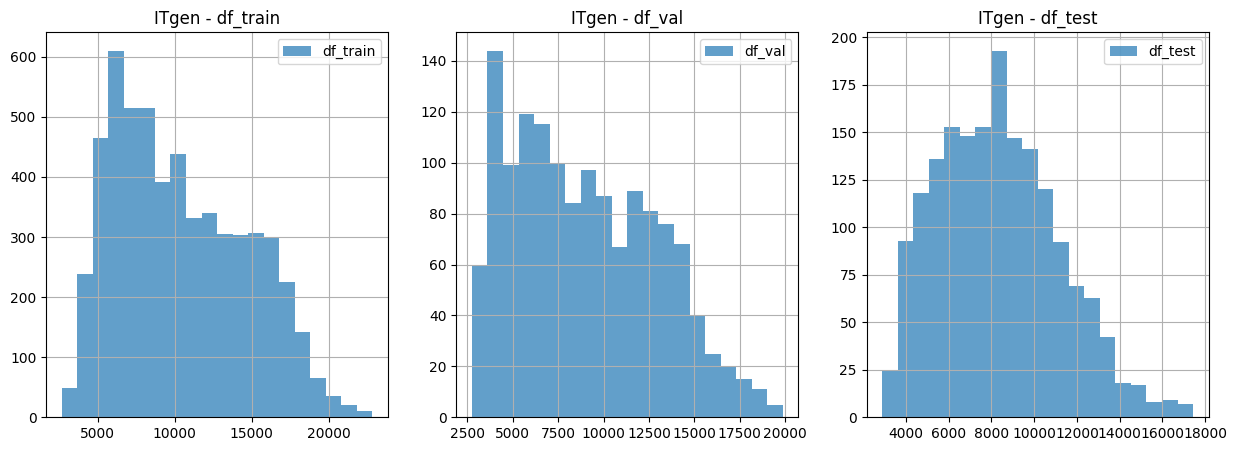

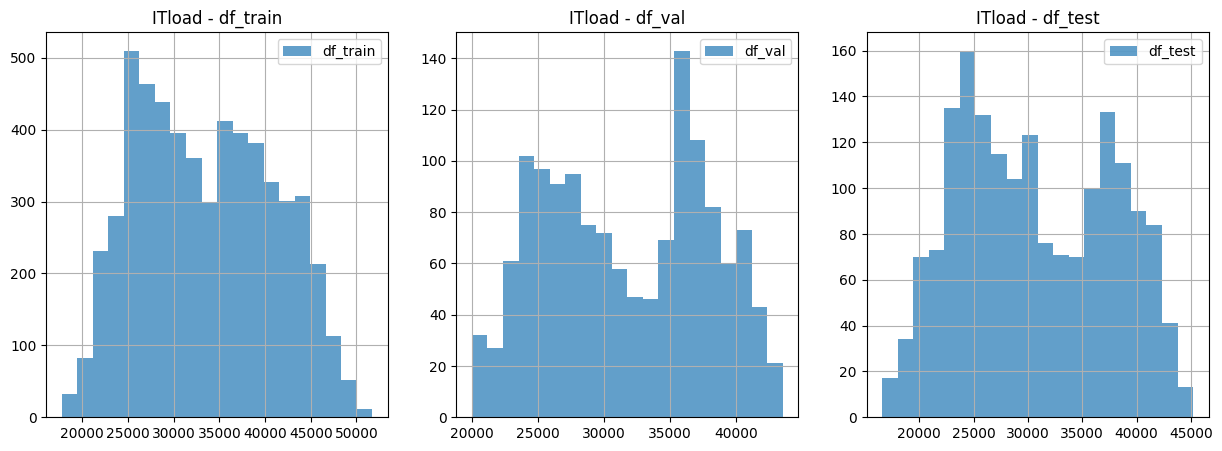

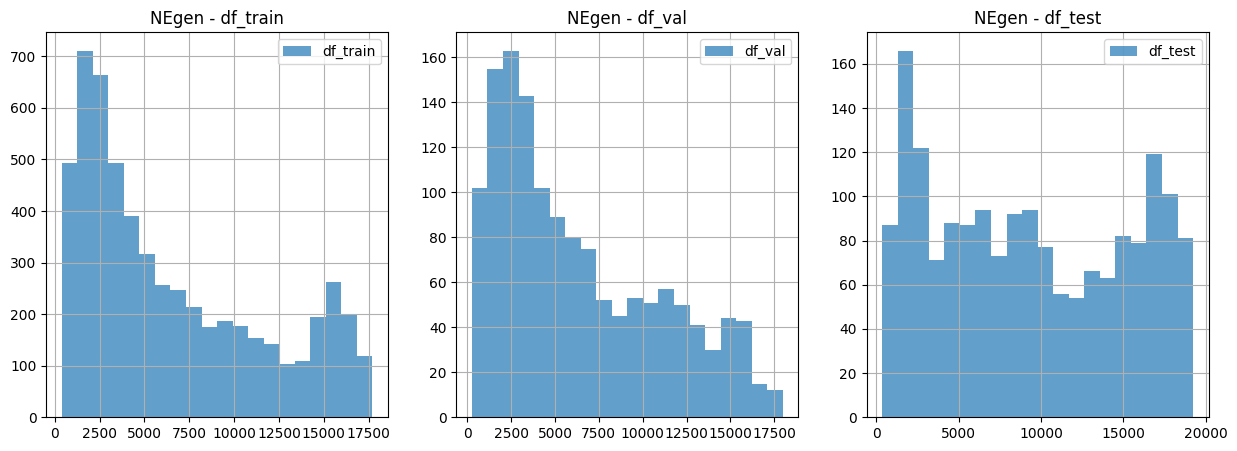

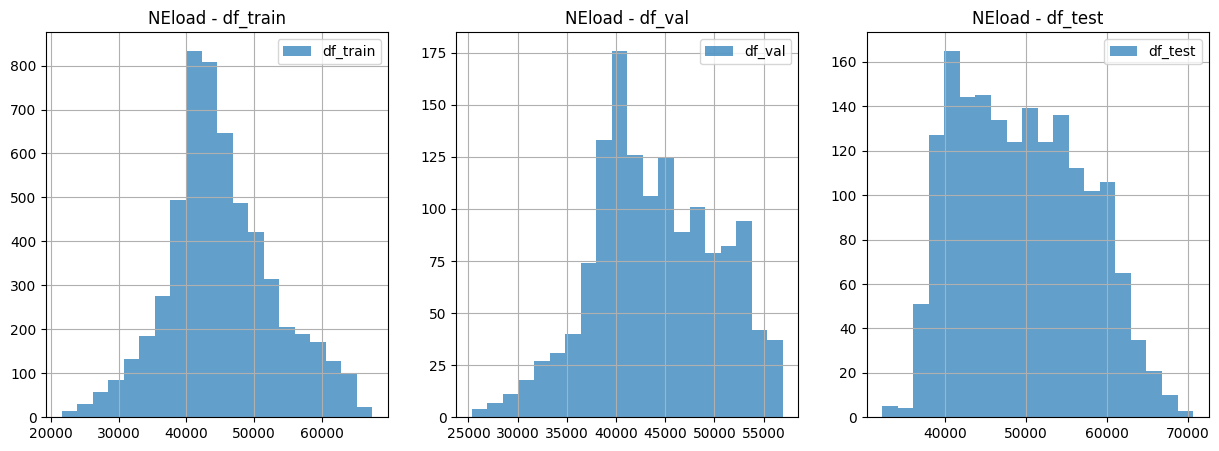

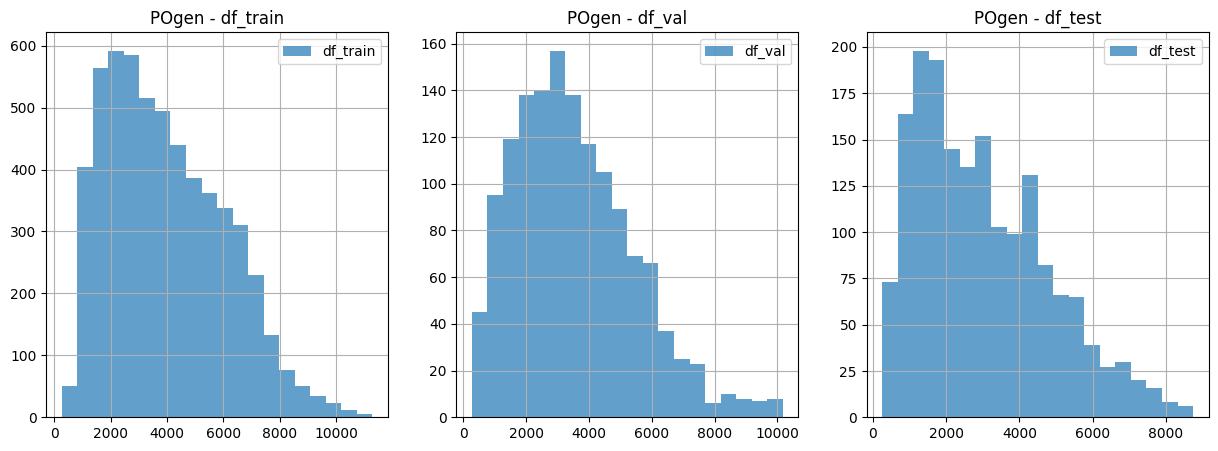

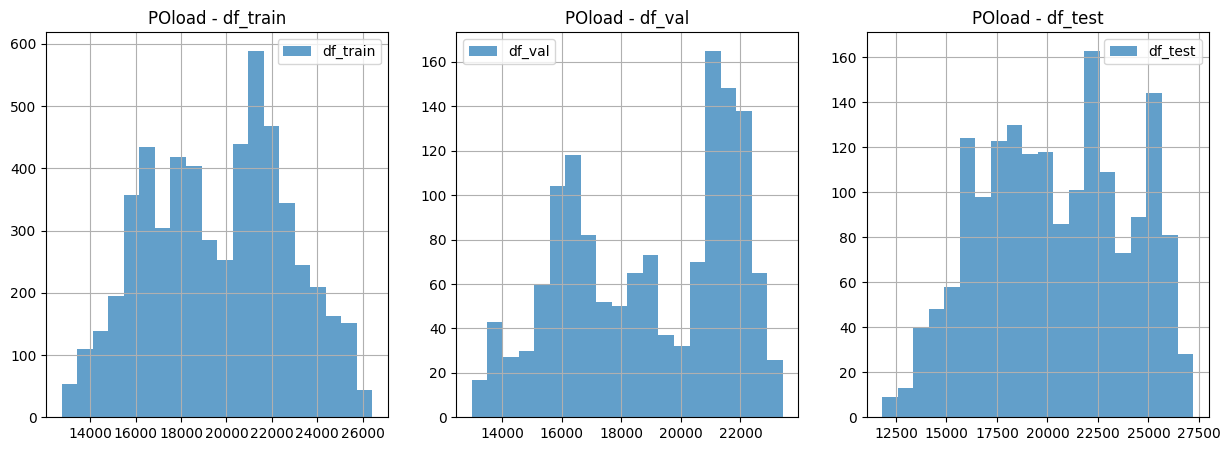

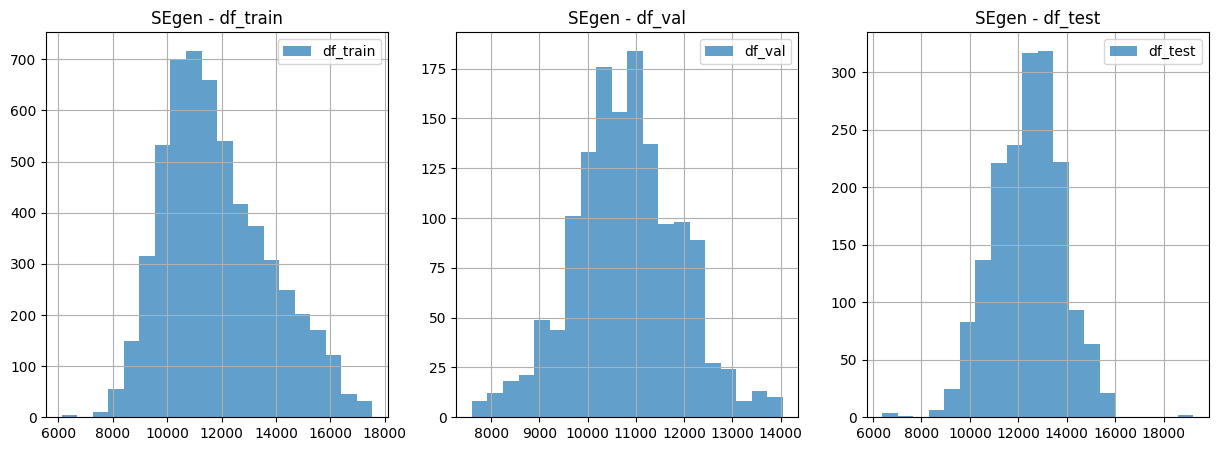

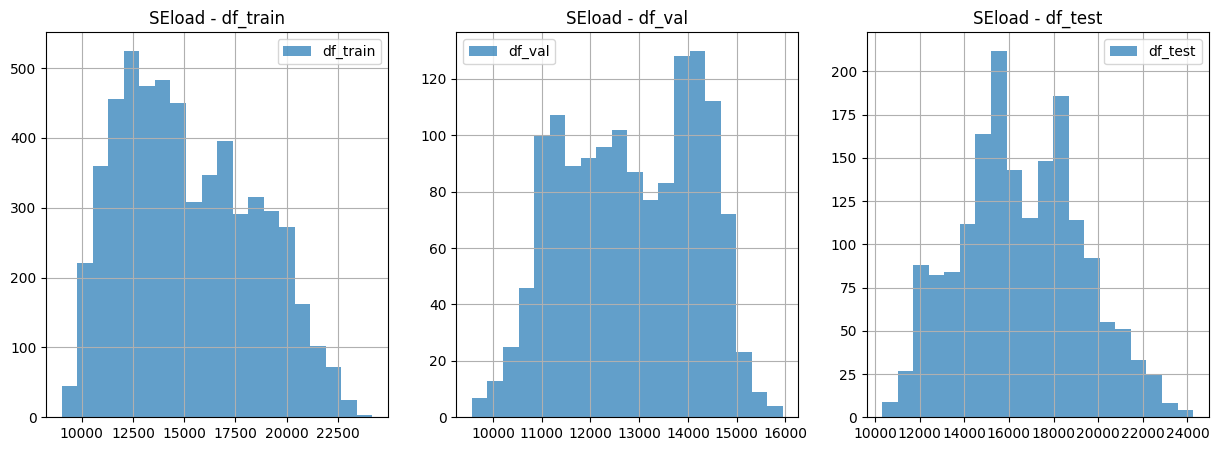

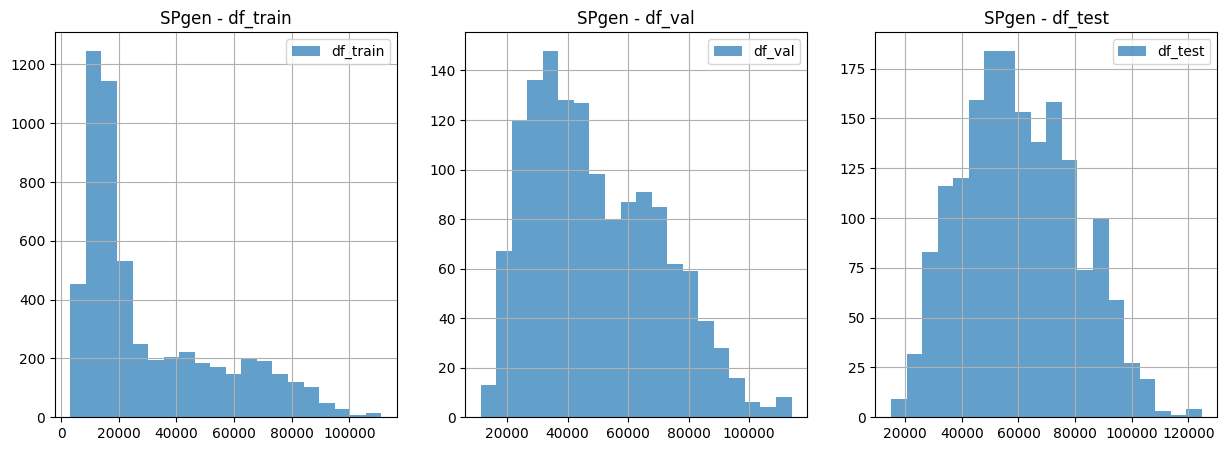

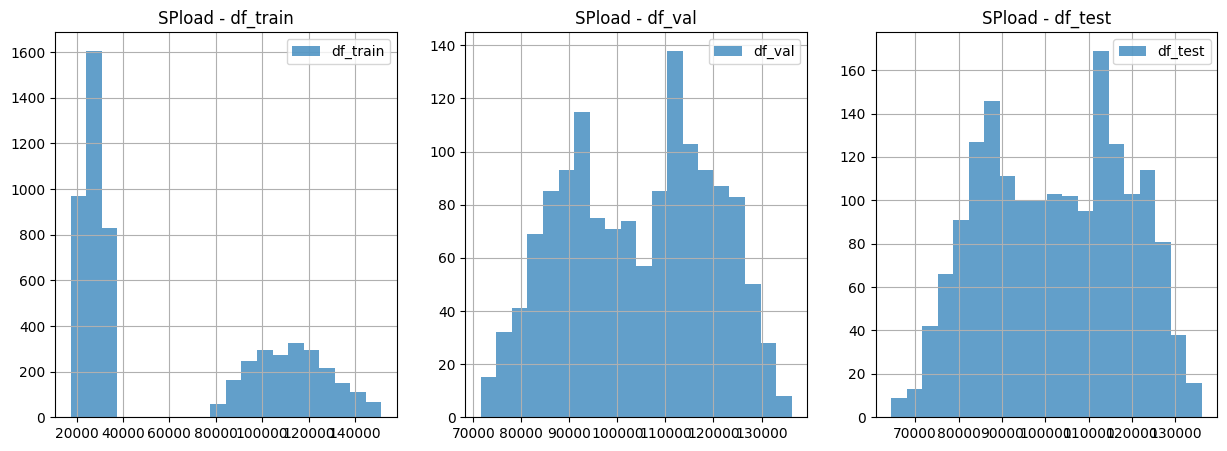

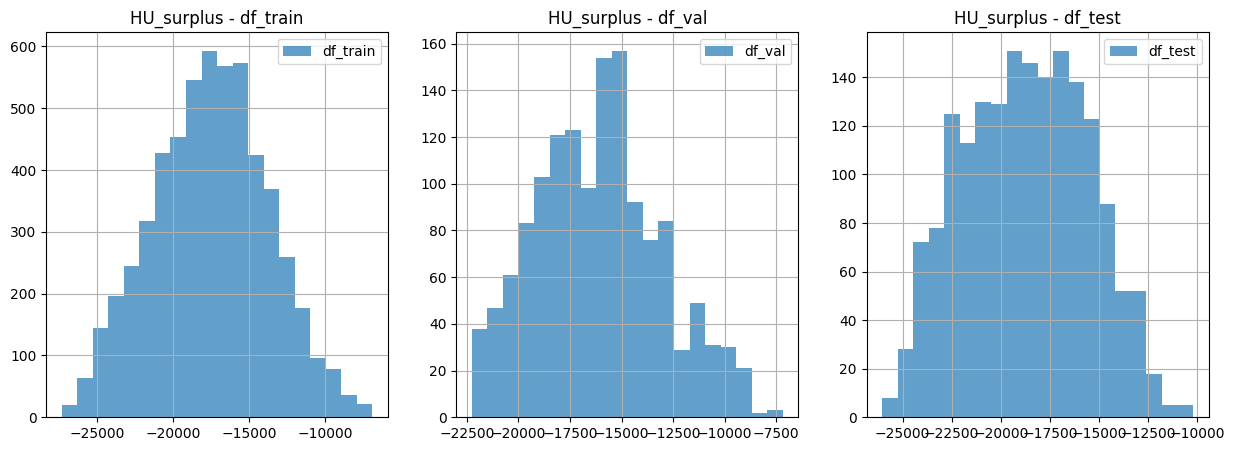

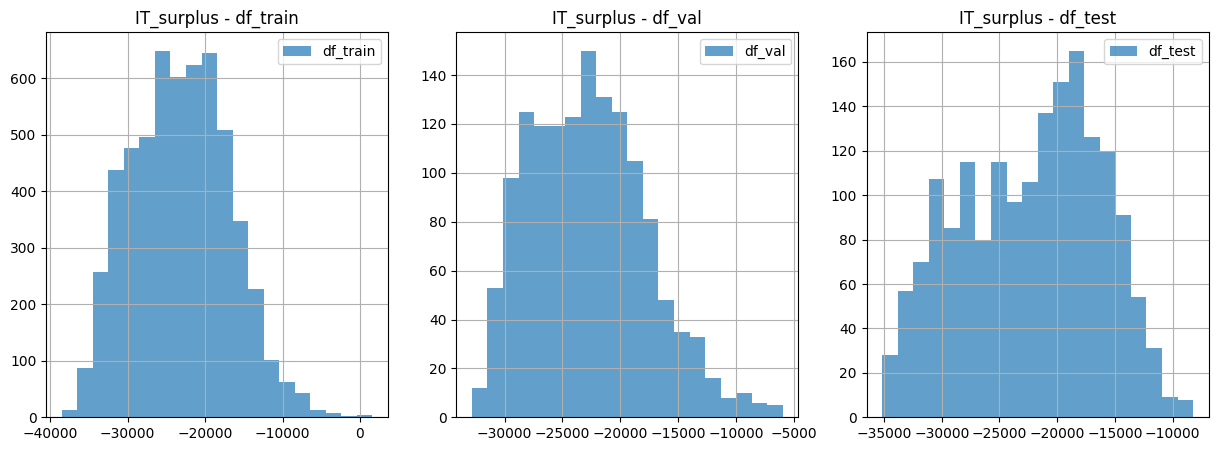

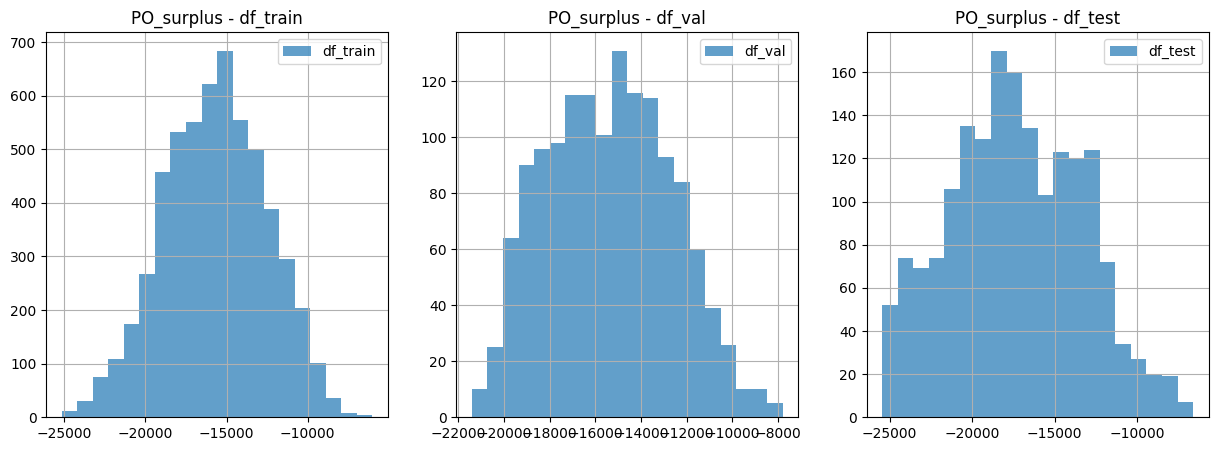

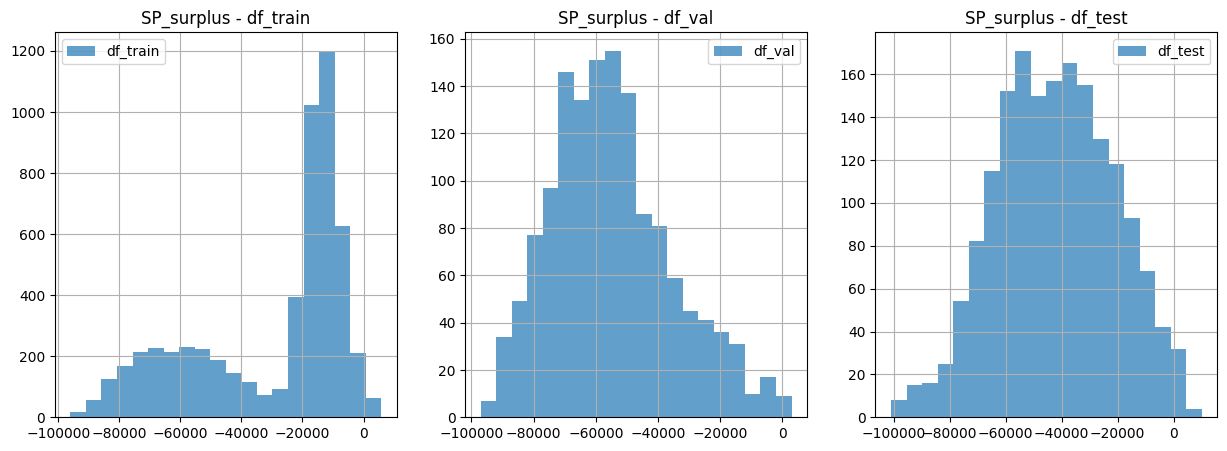

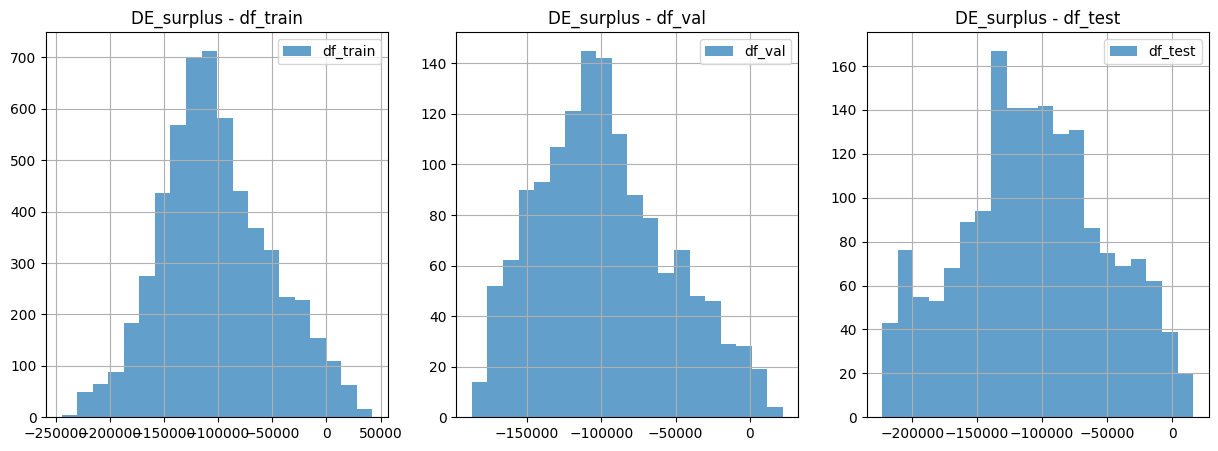

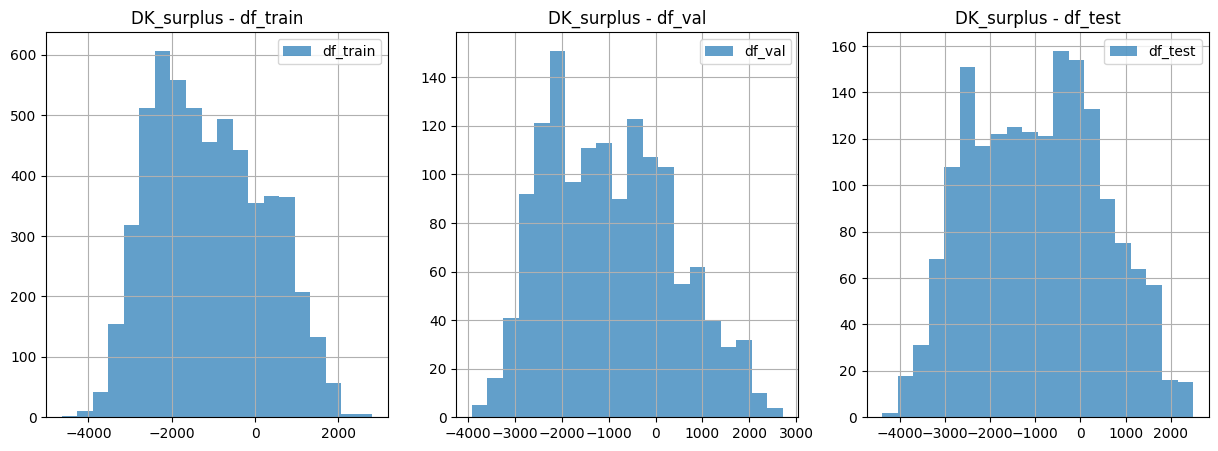

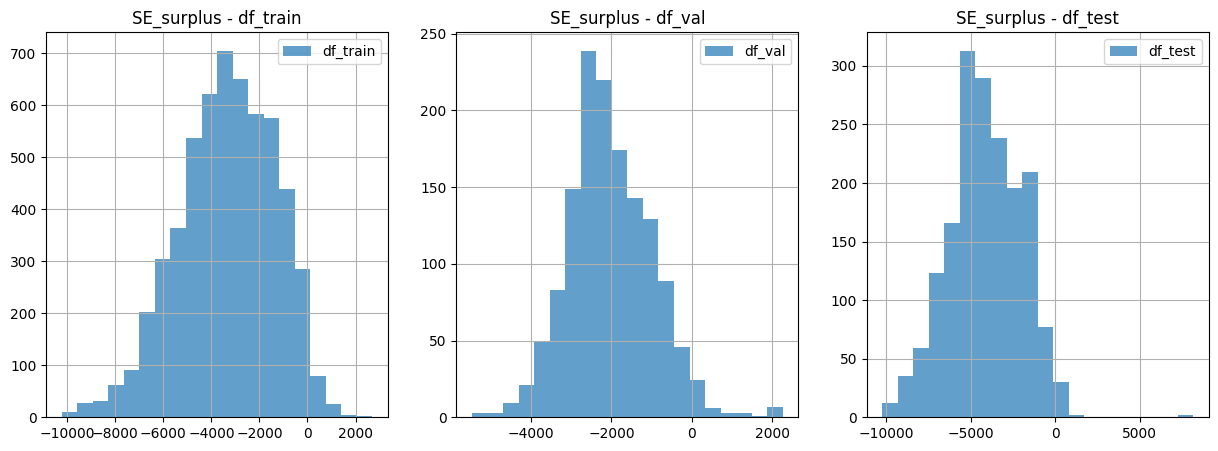

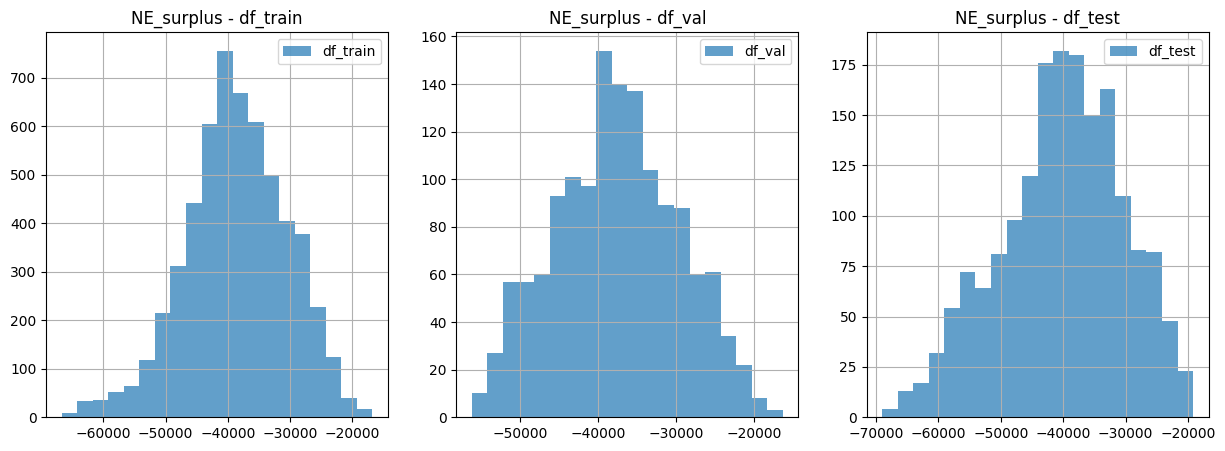

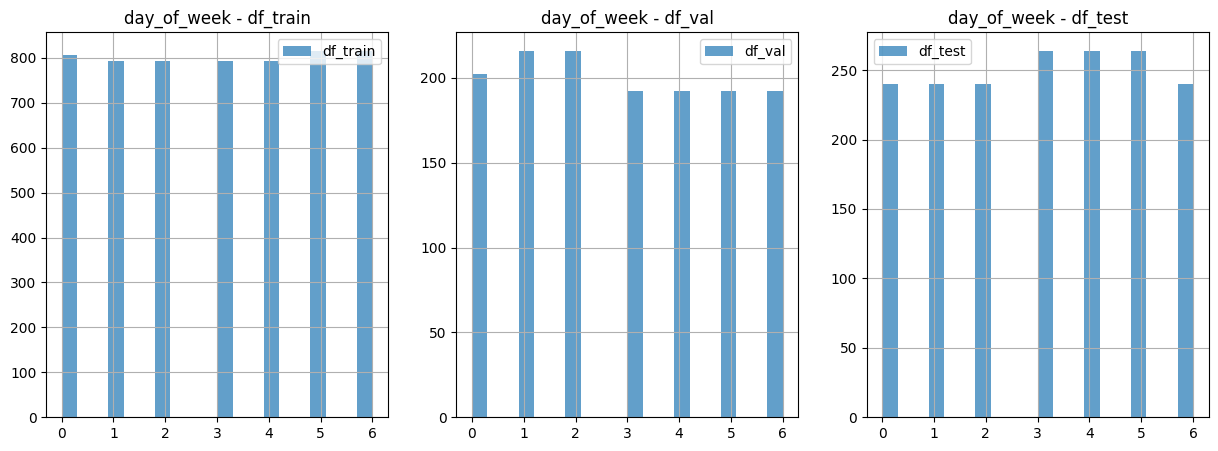

In [46]:
import matplotlib.pyplot as plt

# List of features to compare
features_to_compare = [
    'Hour', 'DEgen', 'DEload', 'DKgen', 'DKload', 'HUgen', 'HUload',
    'ITgen', 'ITload', 'NEgen', 'NEload', 'POgen', 'POload', 'SEgen',
    'SEload', 'SPgen', 'SPload', 'HU_surplus', 'IT_surplus', 'PO_surplus',
    'SP_surplus', 'DE_surplus', 'DK_surplus', 'SE_surplus', 'NE_surplus',
    'day_of_week'
]

# Assuming scaled_df_train, scaled_df_val, and scaled_df_test are your DataFrames
dfs = [df_train, df_val, df_test]
df_names = ['df_train', 'df_val', 'df_test']

# Plot histograms for each feature and each DataFrame
for feature in features_to_compare:
    plt.figure(figsize=(15, 5))
    for i, (df, df_name) in enumerate(zip(dfs, df_names), 1):
        plt.subplot(1, 3, i)
        df[feature].hist(bins=20, alpha=0.7, label=df_name)
        plt.title(f'{feature} - {df_name}')
        plt.legend()
    plt.show()

### Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = [
    'Hour', 'DEgen', 'DEload', 'DKgen', 'DKload', 'HUgen', 'HUload',
    'ITgen', 'ITload', 'NEgen', 'NEload', 'POgen', 'POload', 'SEgen',
    'SEload', 'SPgen', 'SPload', 'HU_surplus', 'IT_surplus', 'PO_surplus',
    'SP_surplus', 'DE_surplus', 'DK_surplus', 'SE_surplus', 'NE_surplus',
    'day_of_week'
]

def scale_data(df_train, df_val, df_test):
    
    scaler = MinMaxScaler()
    
    # Fit the scaler on training data and transform the features
    df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])
    
    # Transform validation and test data using the scaler fitted on training data
    df_val[features_to_scale] = scaler.transform(df_val[features_to_scale])
    df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

    return df_train, df_val, df_test

# Usage example
scaled_df_train, scaled_df_val, scaled_df_test = scale_data(df_train, df_val, df_test)



C:\Users\adria\AppData\Local\Temp\ipykernel_14712\156545150.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])


### Checking distributions in train, test and val

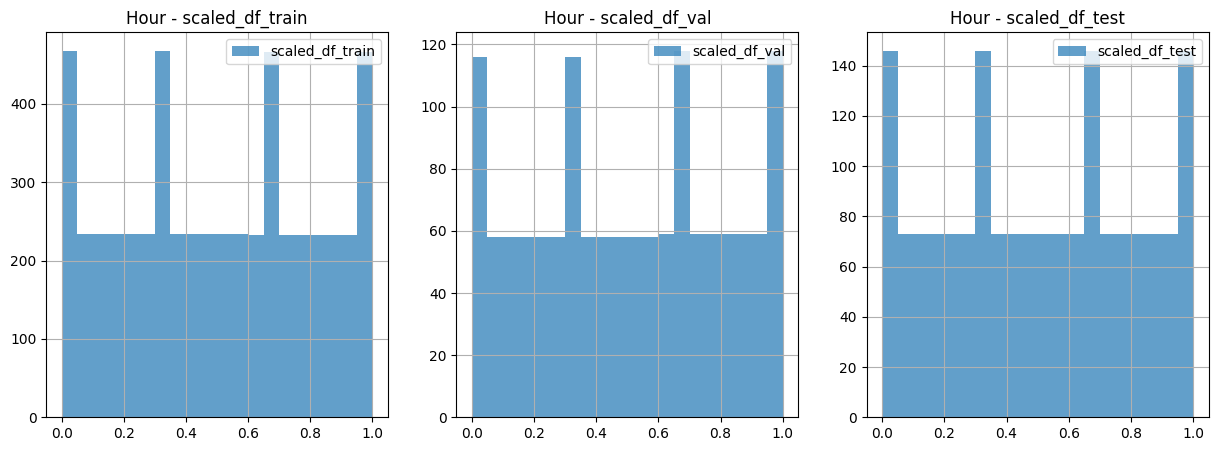

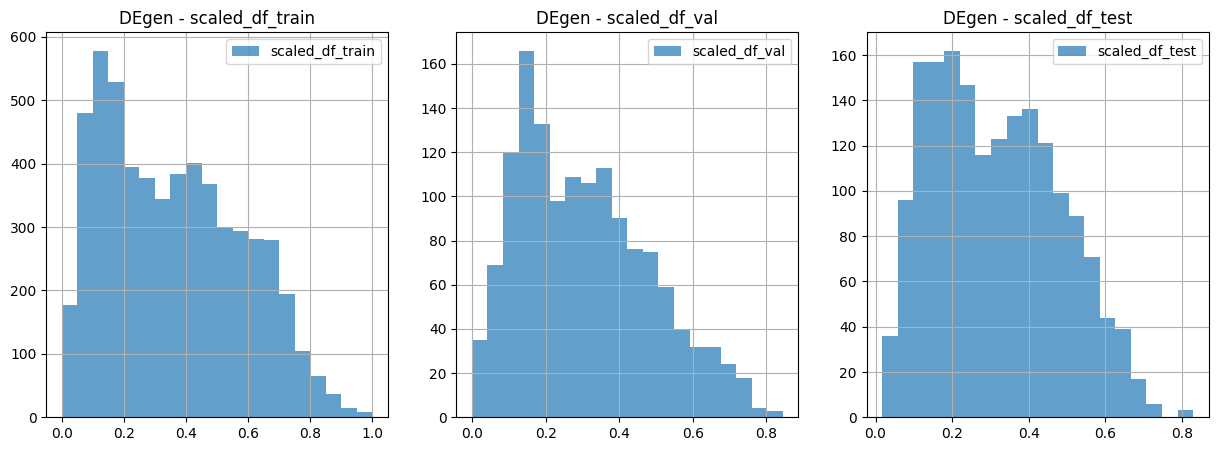

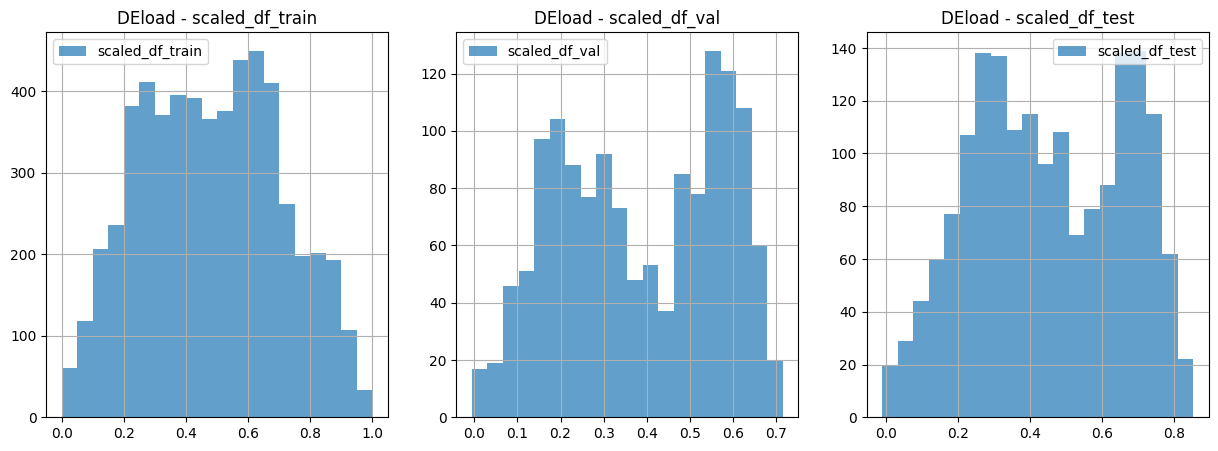

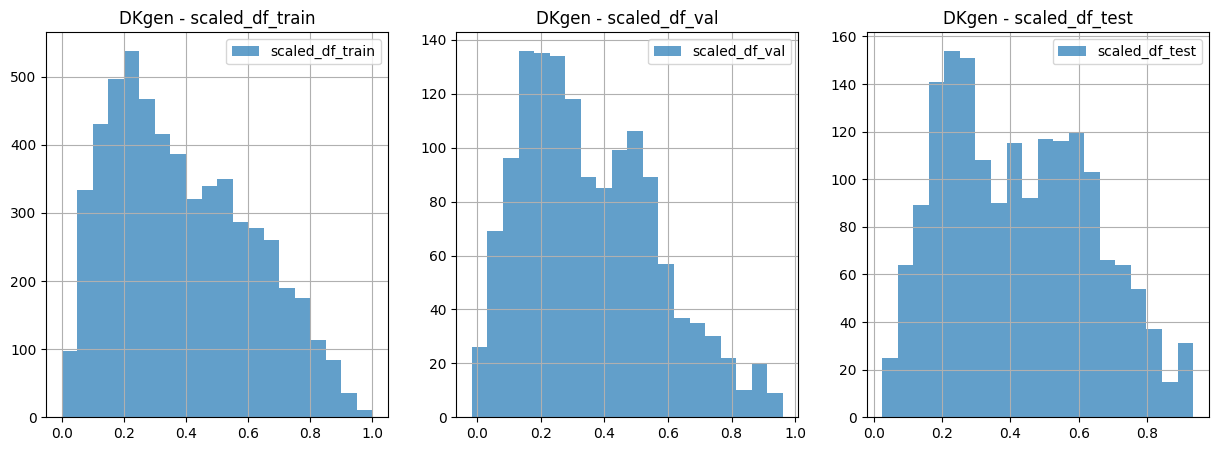

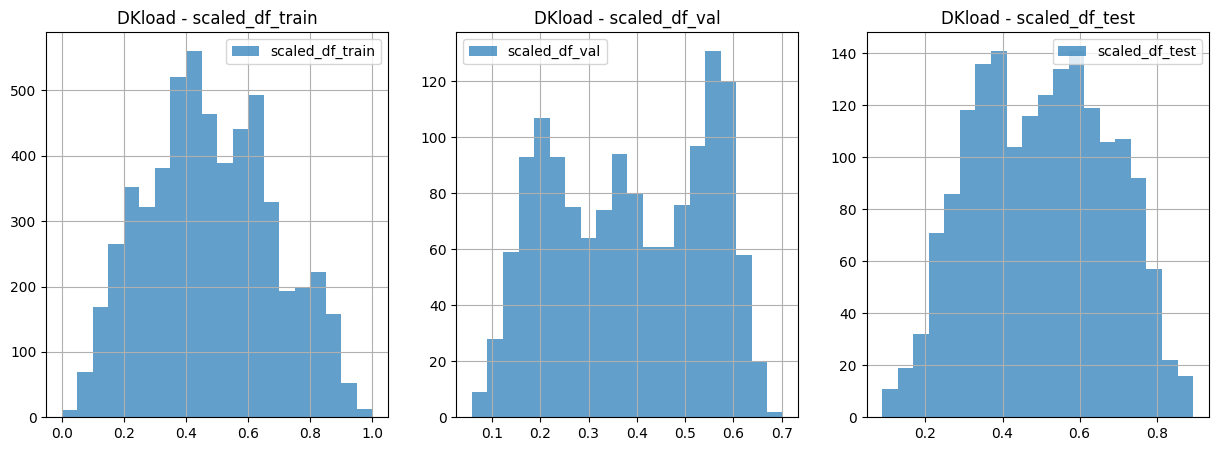

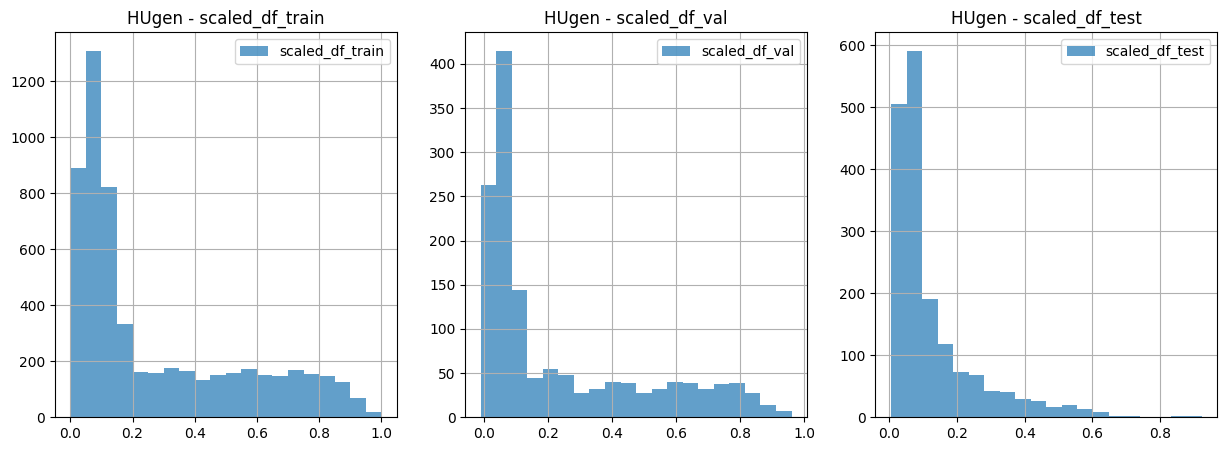

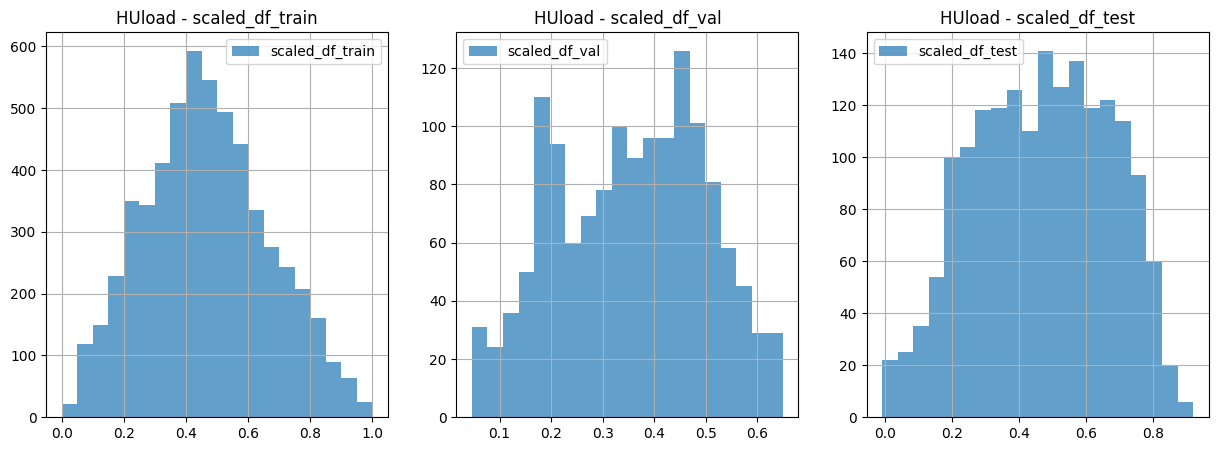

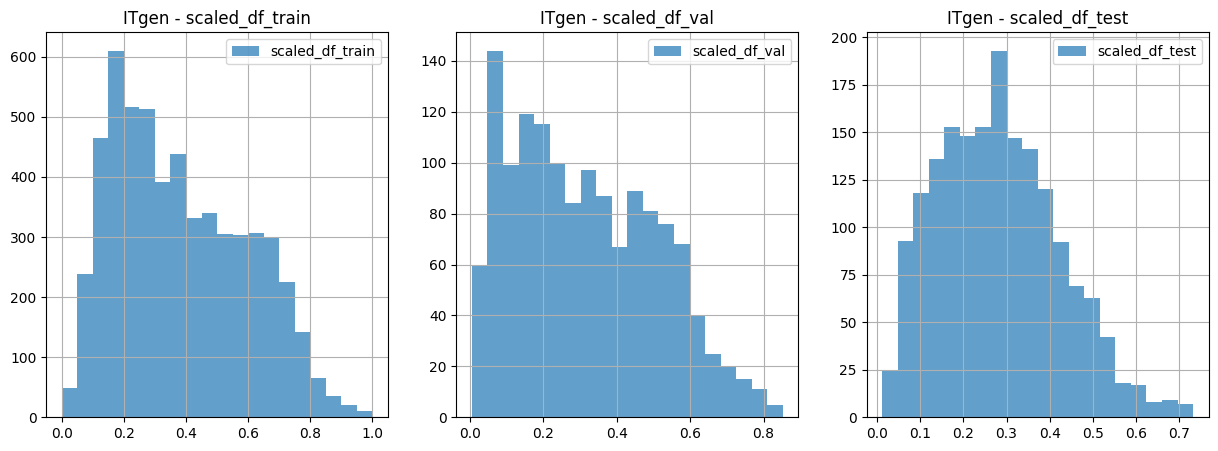

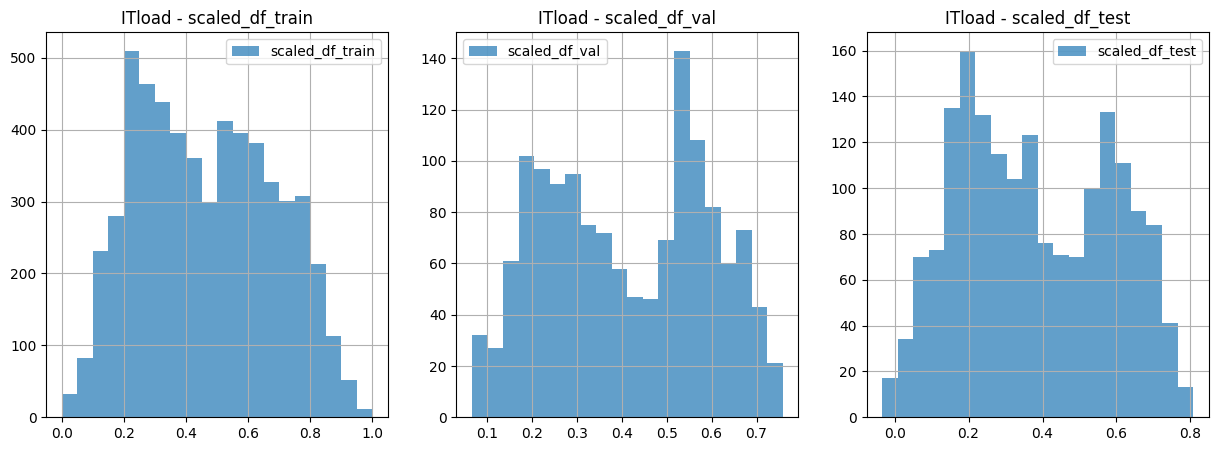

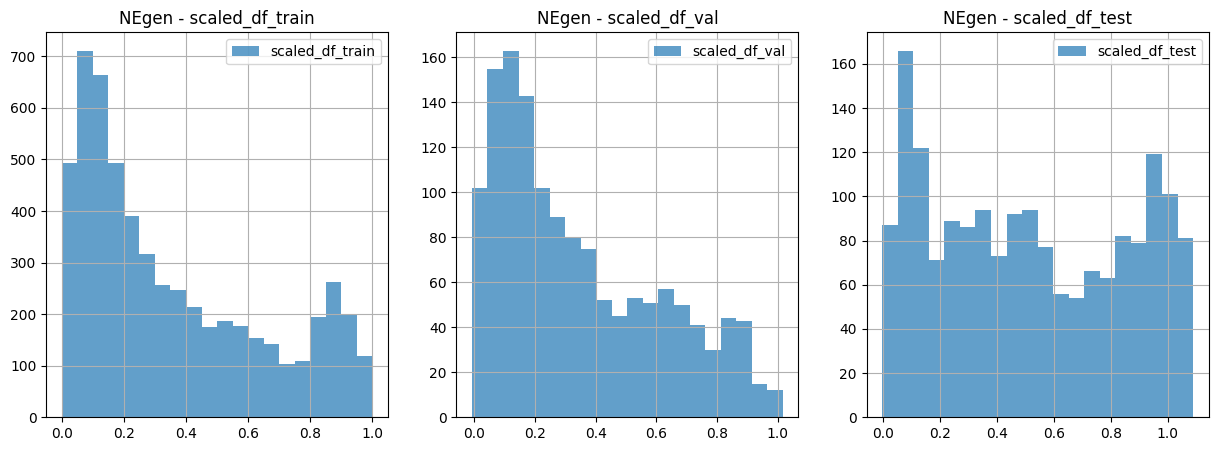

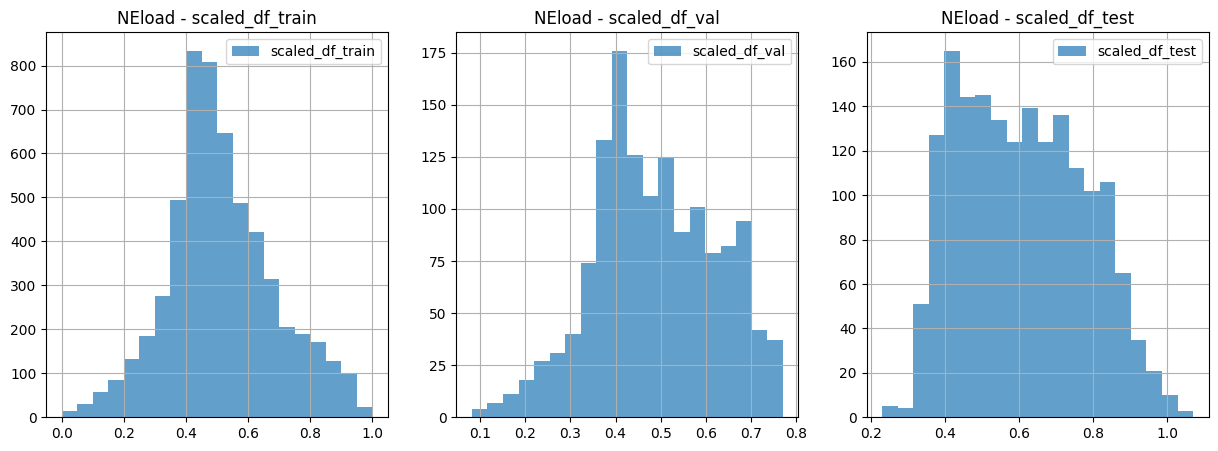

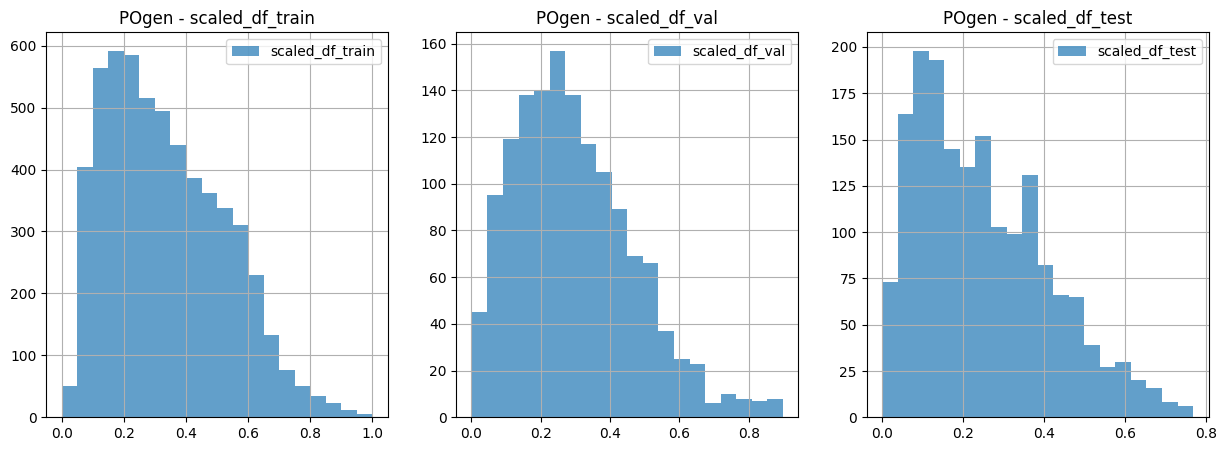

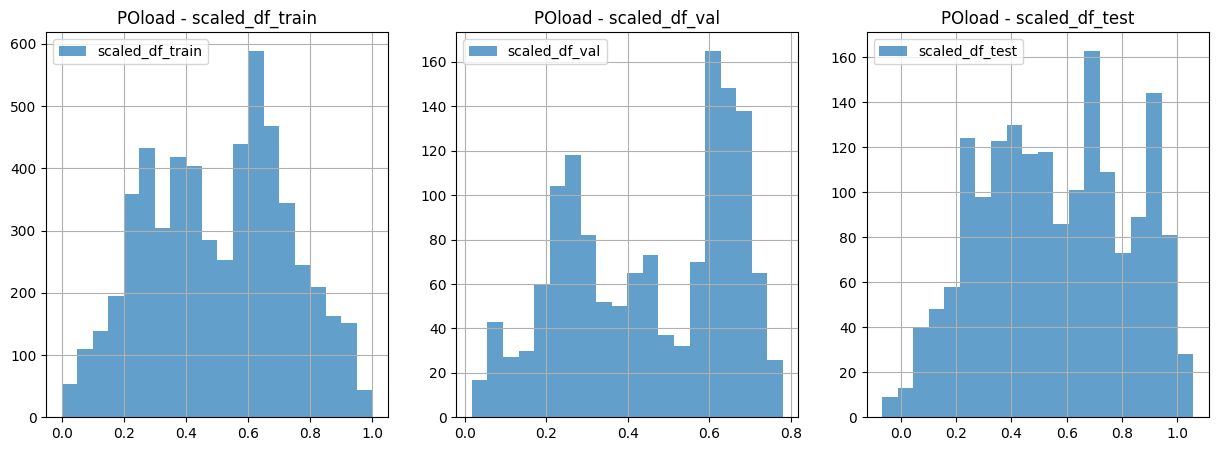

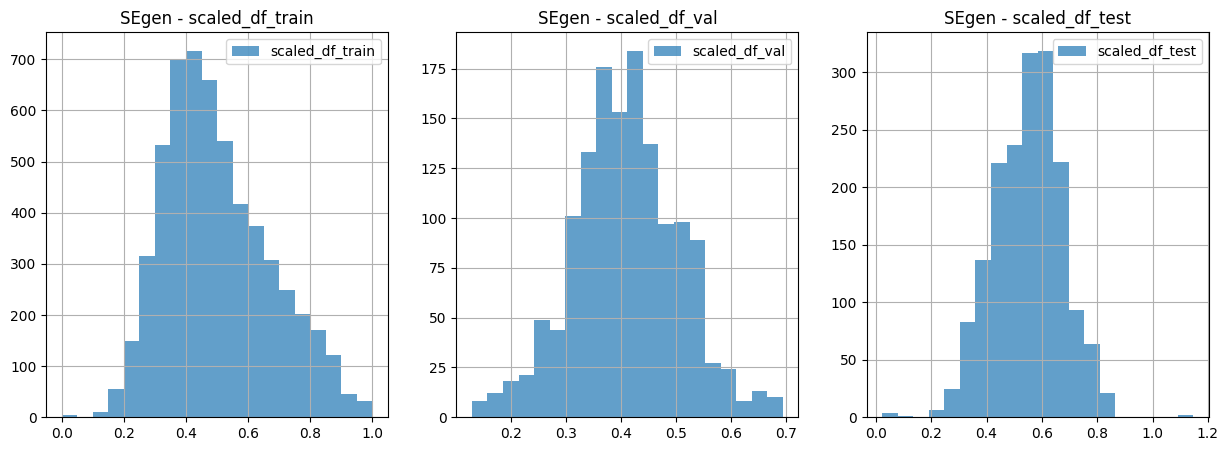

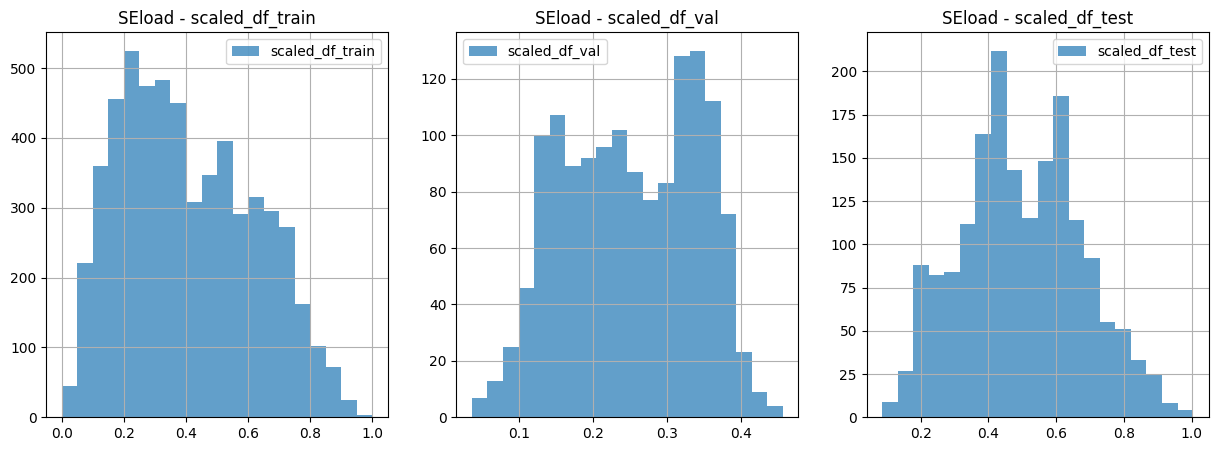

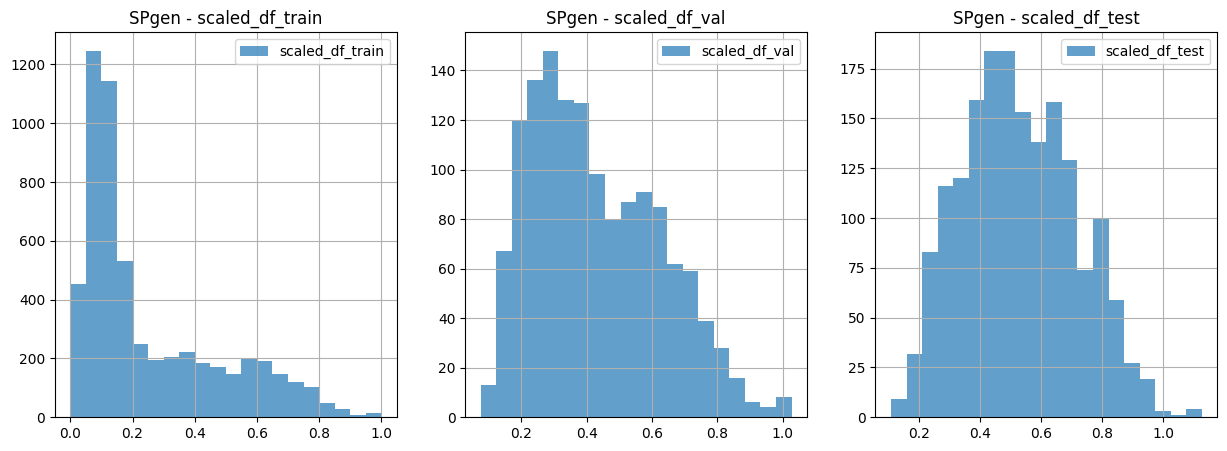

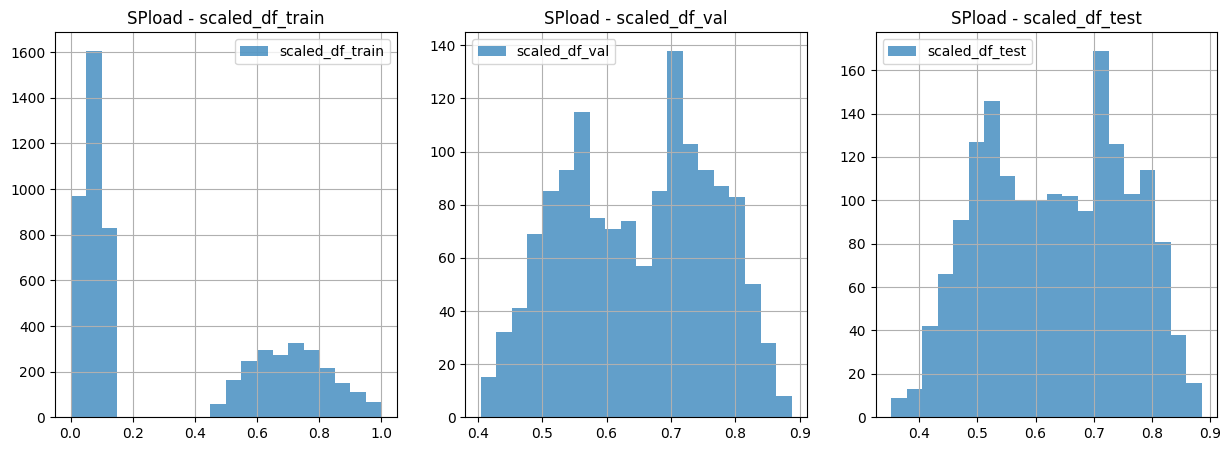

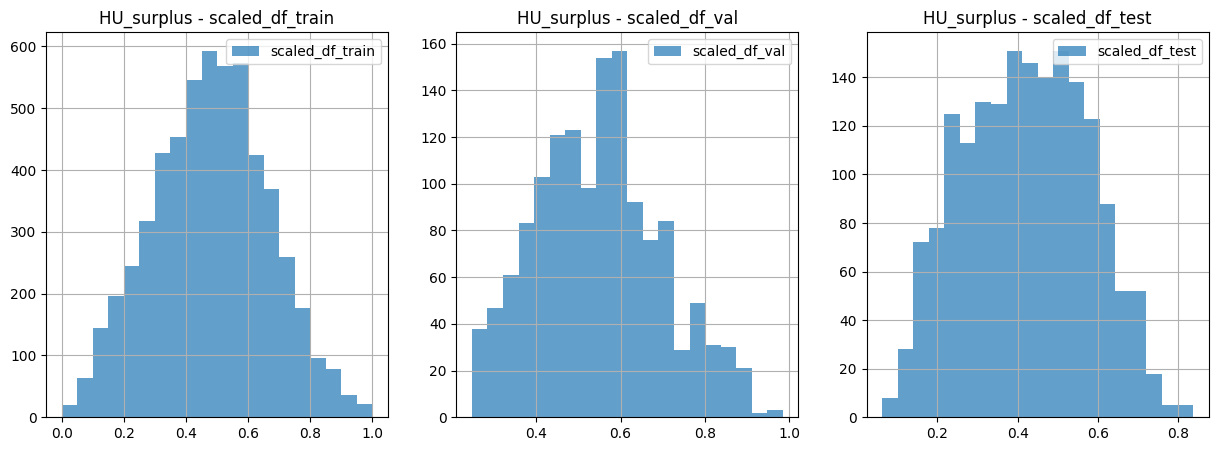

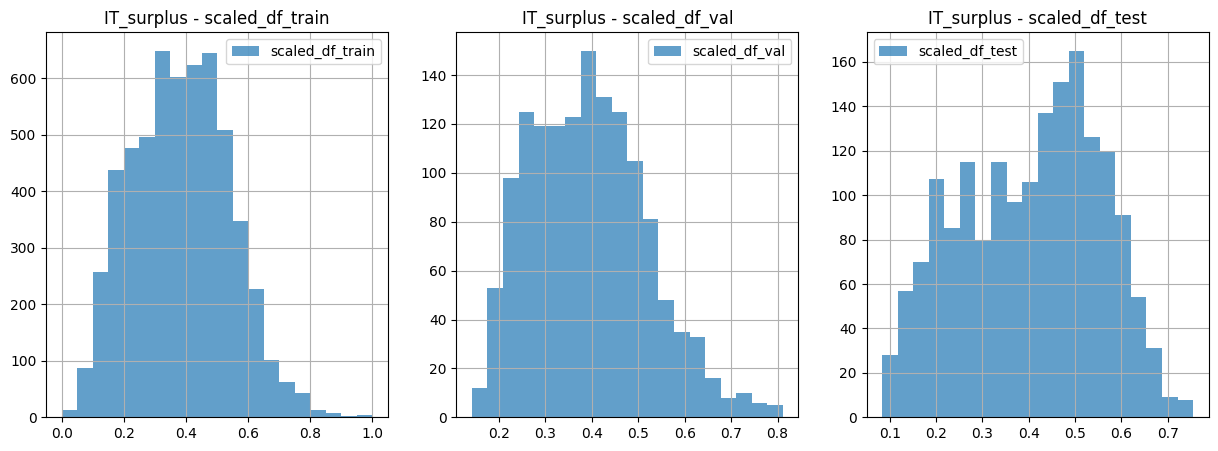

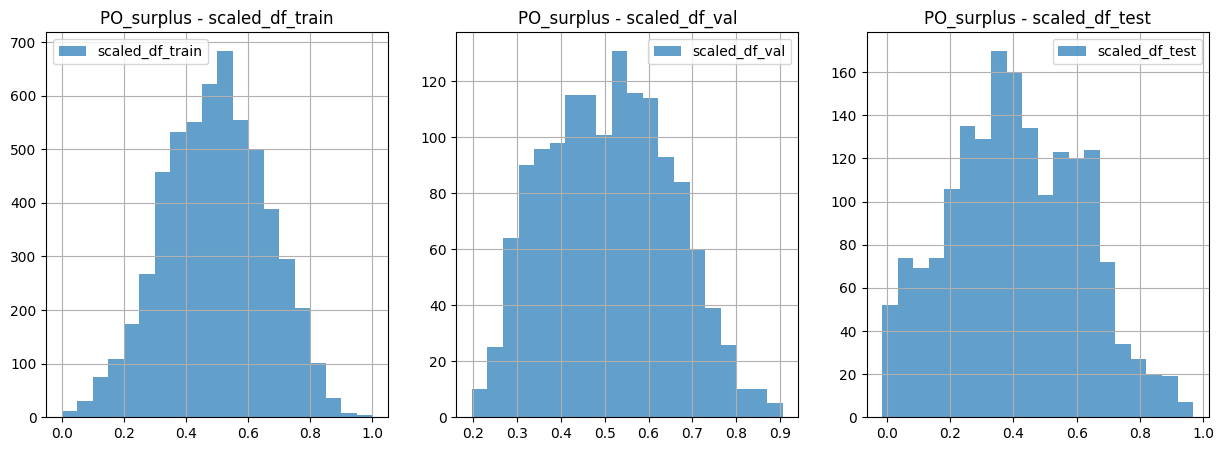

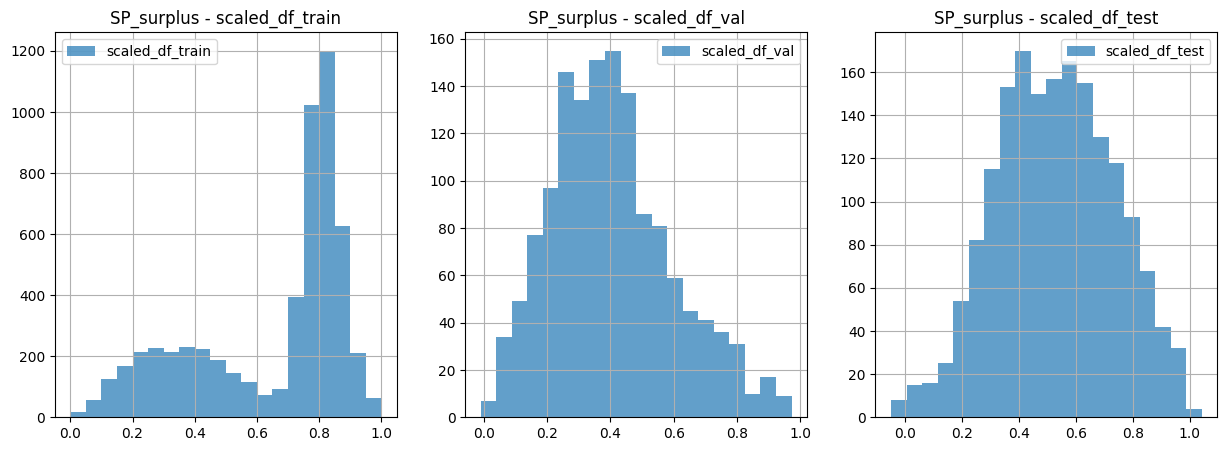

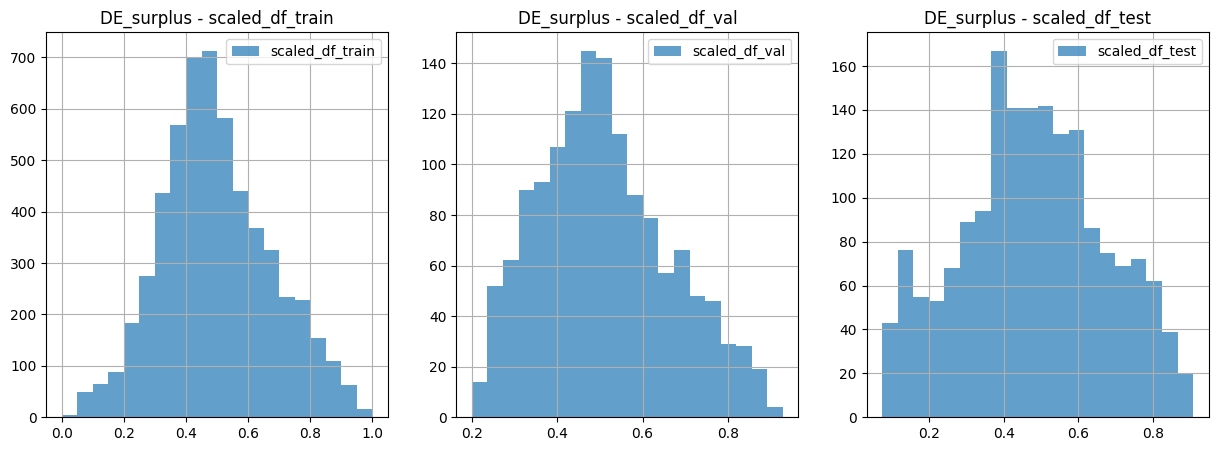

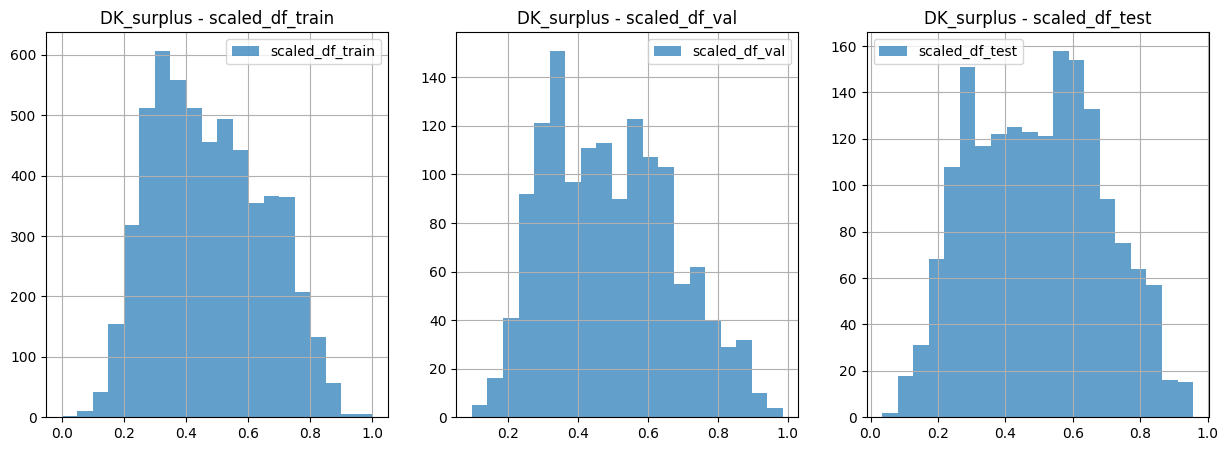

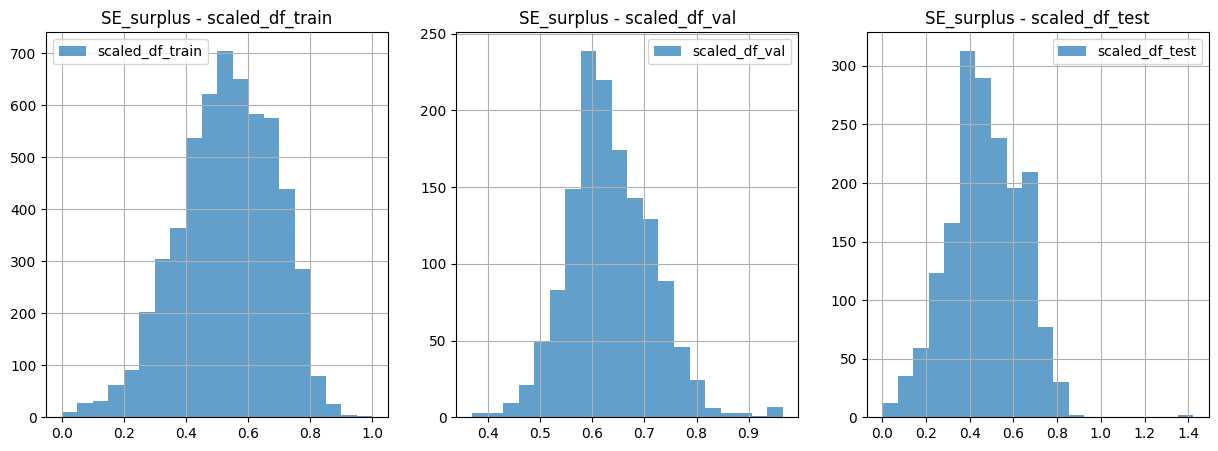

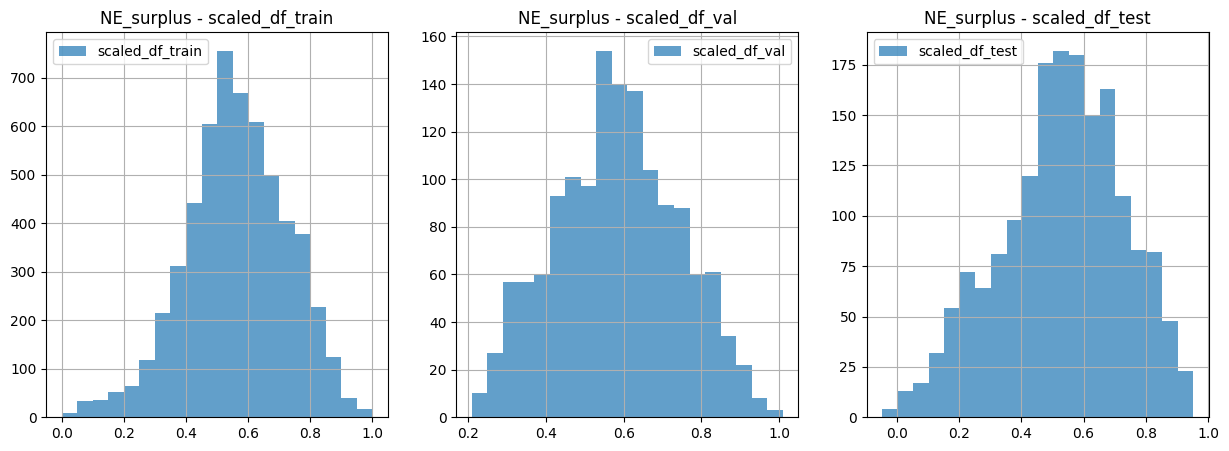

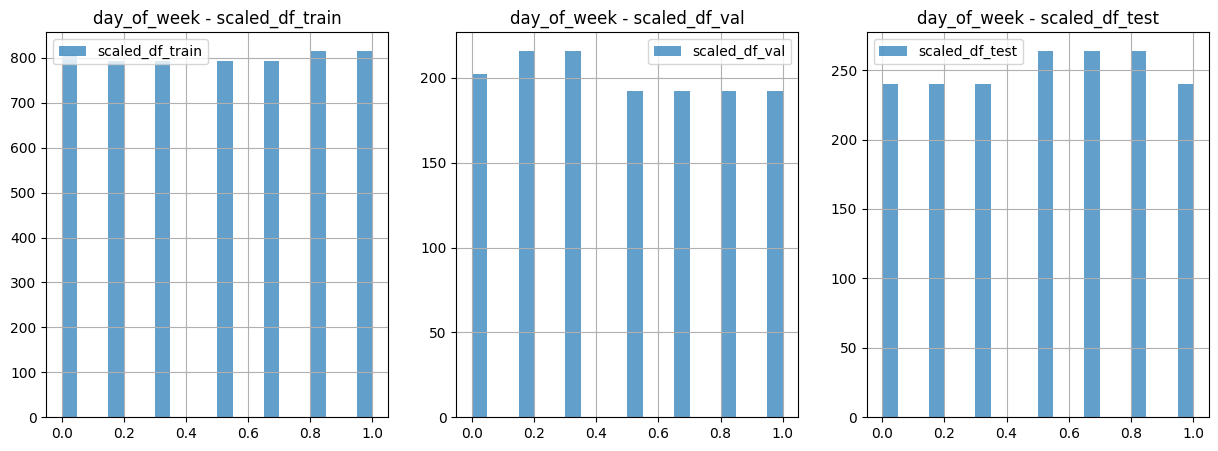

In [36]:
# import matplotlib.pyplot as plt

# # List of features to plot histograms for
# features_to_plot = [
#     'Hour', 'DEgen', 'DEload', 'DKgen', 'DKload', 'HUgen', 'HUload',
#     'ITgen', 'ITload', 'NEgen', 'NEload', 'POgen', 'POload', 'SEgen',
#     'SEload', 'SPgen', 'SPload', 'HU_surplus', 'IT_surplus', 'PO_surplus',
#     'SP_surplus', 'DE_surplus', 'DK_surplus', 'SE_surplus', 'NE_surplus',
#     'day_of_week'
# ]

# # Assuming scaled_df_train, scaled_df_val, and scaled_df_test are your DataFrames
# dfs = [scaled_df_train, scaled_df_val, scaled_df_test]
# df_names = ['scaled_df_train', 'scaled_df_val', 'scaled_df_test']

# # Plot histograms for each DataFrame
# for df, df_name in zip(dfs, df_names):
#     plt.figure(figsize=(15, 10))
#     for i, feature in enumerate(features_to_plot, 1):
#         plt.subplot(5, 6, i)
#         df[feature].hist(bins=20)
#         plt.title(feature)
#     plt.suptitle(f'Histograms for {df_name}')
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.show()


import matplotlib.pyplot as plt

# List of features to compare
features_to_compare = [
    'Hour', 'DEgen', 'DEload', 'DKgen', 'DKload', 'HUgen', 'HUload',
    'ITgen', 'ITload', 'NEgen', 'NEload', 'POgen', 'POload', 'SEgen',
    'SEload', 'SPgen', 'SPload', 'HU_surplus', 'IT_surplus', 'PO_surplus',
    'SP_surplus', 'DE_surplus', 'DK_surplus', 'SE_surplus', 'NE_surplus',
    'day_of_week'
]

# Assuming scaled_df_train, scaled_df_val, and scaled_df_test are your DataFrames
dfs = [scaled_df_train, scaled_df_val, scaled_df_test]
df_names = ['scaled_df_train', 'scaled_df_val', 'scaled_df_test']

# Plot histograms for each feature and each DataFrame
for feature in features_to_compare:
    plt.figure(figsize=(15, 5))
    for i, (df, df_name) in enumerate(zip(dfs, df_names), 1):
        plt.subplot(1, 3, i)
        df[feature].hist(bins=20, alpha=0.7, label=df_name)
        plt.title(f'{feature} - {df_name}')
        plt.legend()
    plt.show()



### Creating arrays for the model

In [48]:
# create arrays
X_train, X_val, X_test = scaled_df_train[features].values, scaled_df_val[features].values, scaled_df_test[features].values
y_train, y_val, y_test = df_train[label_column].values, df_val[label_column].values, df_test[label_column].values


print("Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print('==================')
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print('==================')
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Shapes:
X_train: (5606, 30)
y_train: (5606,)
X_val: (1402, 30)
y_val: (1402,)
X_test: (1752, 30)
y_test: (1752,)


In [49]:
# divide the dataset to train the model 

def create_sequences(X, y, window):
    rows = X.shape[0]
    features = X.shape[1]

    sequences = np.zeros((rows - window - 1 , window, features))
    target_values = np.zeros((rows - window - 1 ))

    for i in range(rows - window -1):

        sequences[i, : , : ] = X[ i : (i + window), : ] # cogemos las filas de i a i+window y todas las columnas (features)
        target_values[i] = y[i + window]

        # print(i)

    
    return sequences, target_values


window = 48 # The amount of hours we want to use as input data

# Usage example
sequences_train, target_values_train = create_sequences(X_train, y_train, window)
sequences_val, target_values_val = create_sequences(X_val, y_val, window)
sequences_test, target_values_test = create_sequences(X_test, y_test, window)

print("Shapes:")
print('rows: ', X_train.shape[0])
print('Deberiamos tener secuencias de entrenamiento = rows - window - 1: ', X_train.shape[0] - window - 1)
print("sequences_train:", sequences_train.shape)
print("target_values_train:", target_values_train.shape)
print('==================')
print("sequences_val:", sequences_val.shape)
print("target_values_val:", target_values_val.shape)
print('==================')
print("sequences_test:", sequences_test.shape)
print("target_values_test:", target_values_test.shape)


Shapes:
rows:  5606
Deberiamos tener secuencias de entrenamiento = rows - window - 1:  5557
sequences_train: (5557, 48, 30)
target_values_train: (5557,)
sequences_val: (1353, 48, 30)
target_values_val: (1353,)
sequences_test: (1703, 48, 30)
target_values_test: (1703,)


In [88]:

print('primera secuencia de entrenamiento, primer elemento: ', sequences_train[0, 0, : ], '\n')
print('======================================================================')
print('debería ser igual a df_train.loc[0, features]: ',  df_train.loc[0, features], '\n')
print('======================================================================')
print('primer label de la primera secuencia de entrenamiento: ', target_values_train[0], '\n') 
print('======================================================================')
print('debería ser igual al elemento df_train.loc[window + 1,"label"]: ', df_train.loc[window + 1, 'label'])
print('======================================================================')
print('======================================================================')
print('======================================================================')

print('ultima secuencia de entrenamiento, primer fila: ', sequences_train[-1, 0, : ], '\n')
print('======================================================================')
print('debería ser igual a: ',  df_train.iloc[-(window+2)][features])
print('======================================================================')
print('label de la ultima secuencia de entrenamiento: ', target_values_train[-1], '\n') 
print('======================================================================')
print('debería ser igual al elemento df_train.loc[-1,"label"]: ', df_train.iloc[-1]['label'], y_train[-1])


primera secuencia de entrenamiento, primer elemento:  [ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00  5.00000e+00
  1.00000e+00  1.57373e+05  3.60500e+03  1.37600e+03  5.74500e+03
  1.27680e+04  4.49100e+03  1.11070e+04  1.08270e+04  1.65125e+05
  3.21800e+03  1.64570e+04  1.97560e+04  4.07060e+04  1.39350e+04
  1.53310e+04  1.95300e+04 -7.75200e+03  3.87000e+02 -1.50810e+04
 -1.40110e+04 -2.79380e+04 -9.44400e+03 -4.22400e+03 -8.70300e+03] 

debería ser igual a df_train.loc[0, features]:  Hour                  0
spring                0
summer                0
winter                1
day_of_week           5
is_weekend            1
DEgen          157373.0
DKgen            3605.0
HUgen            1376.0
ITgen            5745.0
NEgen           12768.0
POgen            4491.0
SEgen           11107.0
SPgen           10827.0
DEload         165125.0
DKload           3218.0
HUload          16457.0
ITload          19756.0
NEload          40706.0
POload          13935.0
SEload          153

### Model 



Epoch 1/10

174/174 [==============================] - 14s 38ms/step - loss: nan - val_loss: nan
Epoch 2/10
174/174 [==============================] - 5s 30ms/step - loss: nan - val_loss: nan
Epoch 3/10
174/174 [==============================] - 6s 35ms/step - loss: nan - val_loss: nan
Epoch 4/10
174/174 [==============================] - 5s 31ms/step - loss: nan - val_loss: nan
Epoch 5/10
174/174 [==============================] - 6s 32ms/step - loss: nan - val_loss: nan
Epoch 6/10
174/174 [==============================] - 5s 31ms/step - loss: nan - val_loss: nan
Epoch 7/10
174/174 [==============================] - 5s 31ms/step - loss: nan - val_loss: nan
Epoch 8/10
174/174 [==============================] - 5s 31ms/step - loss: nan - val_loss: nan
Epoch 9/10
174/174 [==============================] - 6s 32ms/step - loss: nan - val_loss: nan
Epoch 10/10
174/174 [==============================] - 5s 31ms/step - loss: nan - val_loss: nan


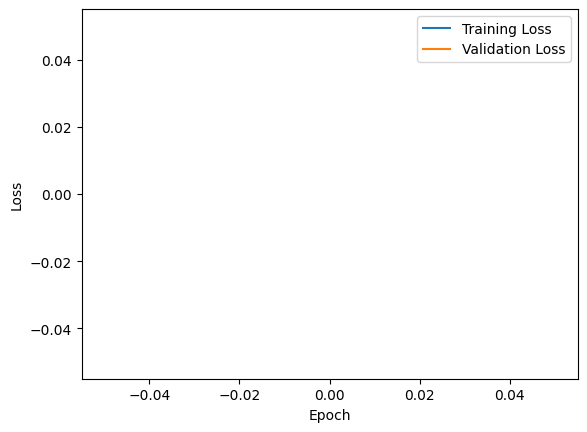

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming sequences_train, target_values_train, sequences_val, target_values_val are your training and validation data
# Adjust the input shape, LSTM units, and other parameters based on your data and task

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(sequences_train.shape[1], sequences_train.shape[2])))
model.add(Dense(units=1))  # Output layer with 1 neuron for regression task

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')  # Use appropriate loss for your task

# Train the model
history = model.fit(sequences_train, target_values_train, epochs=10, batch_size=32, validation_data=(sequences_val, target_values_val))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
